In [1]:
import sys
# Define relative path.
sys.path.append("..")

In [2]:
import itertools
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scrypy.sampling_schemes import morris_trajectory
from scrypy.sampling_schemes import trajectory_sample
from scrypy.select_sample_set import campolongo_2007
from scrypy.select_sample_set import intermediate_ge_menendez_2014
from scrypy.select_sample_set import final_ge_menendez_2014
from scrypy.select_sample_set import distance_matrix
from scrypy.select_sample_set import total_distance

In [3]:
def bar_plot(input_par_array):
    new_list = input_par_array.reshape(-1, 1).tolist()
    merged = pd.Series(itertools.chain.from_iterable(new_list))
    vc = merged.value_counts().sort_index()
    vc /= float(vc.sum())
    assert vc.sum() > 0.999
    ax = vc.plot(kind='bar')
    fig = ax.get_figure()
    fig.autofmt_xdate()

In [4]:
# Create list of n_traj_sample trajectories

n_inputs = 4
n_levels = 6
n_traj_sample = 20
sample_traj_list, _ = trajectory_sample(n_traj_sample, n_inputs, n_levels)

simple_morris_sample = np.vstack(sample_traj_list)
simple_pairs_dist_matrix = distance_matrix(sample_traj_list)

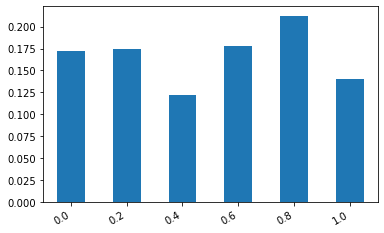

In [5]:
bar_plot(simple_morris_sample)

0.30785417556762695


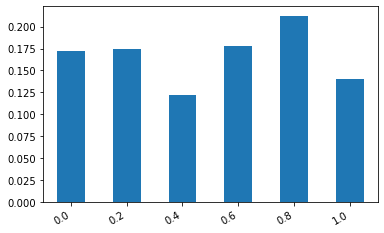

In [6]:
"""Experiment Final Ge/Menendez(2014)"""
# 30 over 15 traj combinations take too long to compute.
start = time.time()

final_ge_menendez_2014_list, final_gm14_pairs_dist_matrix = final_ge_menendez_2014(
    sample_traj_list, n_traj=10
)

end = time.time()
print(end - start)

gm14_array = simple_morris_sample = np.vstack(sample_traj_list)
bar_plot(gm14_array)

0.10938262939453125


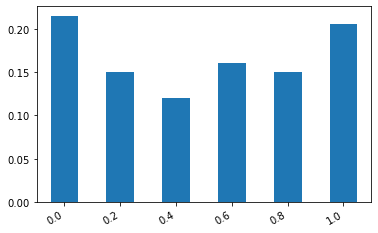

In [7]:
"""Experiment Intermediate Ge/Menendez(2014)"""
# 30 over 15 traj combinations take too long to compute.
start = time.time()

intermediate_ge_menendez_2014_list, intermediate_gm14_pairs_dist_matrix = intermediate_ge_menendez_2014(
    sample_traj_list, n_traj=10
)

end = time.time()
print(end - start)

int_gm14_array = np.vstack(intermediate_ge_menendez_2014_list)
bar_plot(int_gm14_array)

10.905590772628784


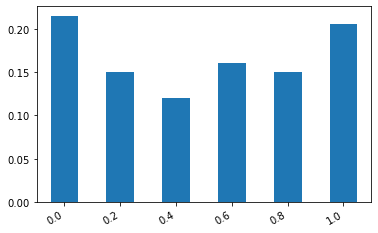

In [8]:
"""Experiment Campolongo (2007)"""
# 30 over 15 traj combinations take too long to compute.
start = time.time()

campolongo_2007_list, c07_pairs_dist_matrix = campolongo_2007(
    sample_traj_list, n_traj=10
)

end = time.time()
print(end - start)

c_array = np.vstack(campolongo_2007_list)
bar_plot(c_array)

In [9]:
# compare total distances
final_gm14_total_distance = total_distance(final_gm14_pairs_dist_matrix)
intermediate_gm14_total_distance = total_distance(intermediate_gm14_pairs_dist_matrix)
c07_gm14_total_distance = total_distance(c07_pairs_dist_matrix)
simple_total_distance = total_distance(simple_pairs_dist_matrix)

print(final_gm14_total_distance)
print(intermediate_gm14_total_distance)
print(c07_gm14_total_distance)
print(simple_total_distance/20)

111.8337226703012
117.52701805391249
117.52701805391249
11.158367666487933
